# 5G Cellular Modem

- A Python-based 5G cellular modem project should include various functionalities to simulate, analyze, and test different aspects of 5G communication. Here are the key functionalities along with their Python implementations:



# Key Functionalities

* Modulation and Demodulation
    - Implement 5G modulation schemes (QPSK, 16-QAM, 64-QAM, 256-QAM).
    - Simulate signal transmission and reception.

* OFDM Transmission and Reception
    - Implement Orthogonal Frequency Division Multiplexing (OFDM).
    - Add cyclic prefix and perform IFFT/FFT.

* Channel Modeling
    - Simulate different channel effects (AWGN, Rayleigh, Rician fading).
    - Implement MIMO channel.

* Error Correction (Channel Coding)
    - Implement LDPC or Polar coding.
    - Simulate decoding with noise.

* Physical Layer Simulation
    - Integrate modulation, OFDM, and channel models.
    - Simulate BER vs SNR.

* Beamforming and MIMO
    - Implement Massive MIMO beamforming.
    - Use Singular Value Decomposition (SVD) for precoding.

* Resource Allocation & Scheduling
    - Implement dynamic scheduling of resources.
    - Optimize subcarrier allocation for users.

* Network Layer Simulation
    - Implement 5G NR frame structure.
    - Simulate handover scenarios.

# 1. Modulation and Demodulation

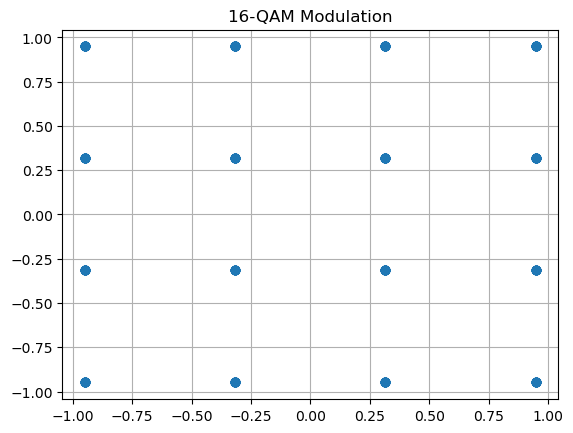

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def qam_modulate(bits, M=16):
    """
    Perform M-QAM modulation.
    :param bits: Input bit sequence
    :param M: Modulation order (16, 64, 256)
    :return: Modulated QAM symbols
    """
    k = int(np.log2(M))  # Bits per symbol
    bit_groups = np.reshape(bits, (-1, k))
    I = np.array([int("".join(map(str, b[:k//2])), 2) for b in bit_groups])
    Q = np.array([int("".join(map(str, b[k//2:])), 2) for b in bit_groups])
    
    I = 2 * I - (np.sqrt(M) - 1)
    Q = 2 * Q - (np.sqrt(M) - 1)
    return (I + 1j * Q) / np.sqrt(10)

bits = np.random.randint(0, 2, 1000)  # Random bits
symbols = qam_modulate(bits, 16)
plt.scatter(symbols.real, symbols.imag)
plt.title("16-QAM Modulation")
plt.grid()
plt.show()


# 2. OFDM Transmission and Reception

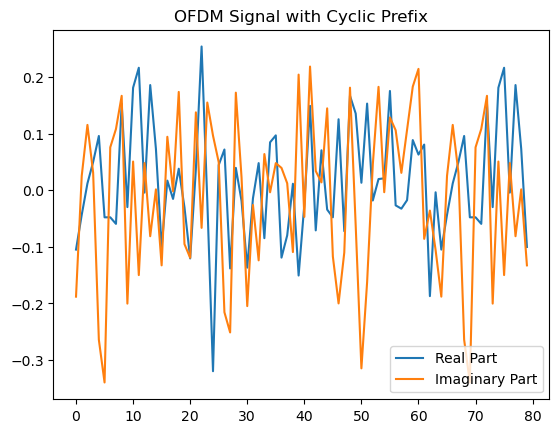

In [6]:
def ofdm_modulate(symbols, N=64, cp_len=16):
    """
    Perform OFDM modulation.
    :param symbols: Input symbols
    :param N: Number of subcarriers
    :param cp_len: Cyclic prefix length
    :return: OFDM modulated signal
    """
    ofdm_symbols = np.fft.ifft(symbols, n=N)
    cyclic_prefix = ofdm_symbols[-cp_len:]
    return np.concatenate([cyclic_prefix, ofdm_symbols])

symbols = np.random.randn(64) + 1j * np.random.randn(64)
ofdm_signal = ofdm_modulate(symbols)
plt.plot(ofdm_signal.real, label="Real Part")
plt.plot(ofdm_signal.imag, label="Imaginary Part")
plt.legend()
plt.title("OFDM Signal with Cyclic Prefix")
plt.show()


# 3. Channel Modeling (Rayleigh Fading)

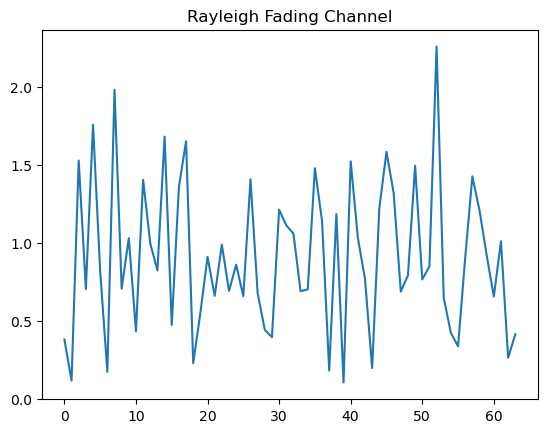

In [7]:
def rayleigh_fading(N):
    """
    Simulate Rayleigh fading channel.
    :param N: Number of samples
    :return: Channel response
    """
    return (np.random.randn(N) + 1j * np.random.randn(N)) / np.sqrt(2)

h = rayleigh_fading(64)
plt.plot(abs(h))
plt.title("Rayleigh Fading Channel")
plt.show()


# 4. LDPC Channel Coding

In [8]:
from scipy.sparse import random as sparse_random

def ldpc_encode(bits, H):
    """
    Simple LDPC encoding using parity check matrix.
    :param bits: Input bit sequence
    :param H: LDPC parity check matrix
    :return: Encoded bits
    """
    parity_bits = np.mod(np.dot(H, bits), 2)
    return np.concatenate([bits, parity_bits])

H = np.random.randint(0, 2, (32, 64))  # Example parity check matrix
bits = np.random.randint(0, 2, 64)
encoded_bits = ldpc_encode(bits, H)
print("Encoded Bits:", encoded_bits)


Encoded Bits: [1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0]


# 5. MIMO Beamforming

In [9]:
def mimo_beamforming(H):
    """
    Perform SVD-based beamforming for MIMO.
    :param H: Channel matrix
    :return: Precoding matrix
    """
    U, S, Vh = np.linalg.svd(H)
    return Vh.T  # Precoding matrix

H = np.random.randn(4, 4) + 1j * np.random.randn(4, 4)
P = mimo_beamforming(H)
print("Beamforming Precoding Matrix:\n", P)


Beamforming Precoding Matrix:
 [[-0.22986575+0.j         -0.26458075+0.j         -0.71431178+0.j
  -0.60573711+0.j        ]
 [ 0.09262781+0.03693924j -0.18525479-0.29067212j -0.01278057-0.54478224j
   0.0608386 +0.75537646j]
 [-0.04819146-0.64658618j  0.32066512-0.57275351j -0.16459047+0.32012256j
   0.07231628+0.11803843j]
 [ 0.32830966+0.63955764j  0.01953294-0.61638719j -0.176968  +0.1786659j
   0.07556932-0.18415805j]]


# 6. 5G Frame Structure & Scheduling

In [10]:
class User:
    def __init__(self, id, demand):
        self.id = id
        self.demand = demand  # Data rate demand in Mbps

class Scheduler:
    def __init__(self, bandwidth, num_users):
        self.bandwidth = bandwidth
        self.users = [User(i, np.random.randint(5, 20)) for i in range(num_users)]

    def allocate_resources(self):
        allocation = {u.id: self.bandwidth / len(self.users) for u in self.users}
        return allocation

scheduler = Scheduler(bandwidth=100, num_users=10)
allocations = scheduler.allocate_resources()
print("Resource Allocations:", allocations)


Resource Allocations: {0: 10.0, 1: 10.0, 2: 10.0, 3: 10.0, 4: 10.0, 5: 10.0, 6: 10.0, 7: 10.0, 8: 10.0, 9: 10.0}


# Next Steps
- Implement Handover Mechanism: Simulate UE movement and switching between base stations.
- Integrate Python GUI (Tkinter or PyQt): Create a dashboard for visualizing modulation, OFDM signals, and MIMO.
- Develop End-to-End BER Simulation: Combine all components to analyze Bit Error Rate (BER).
- Extend this with machine learning for adaptive modulation or 5G RAN simulations? 🚀

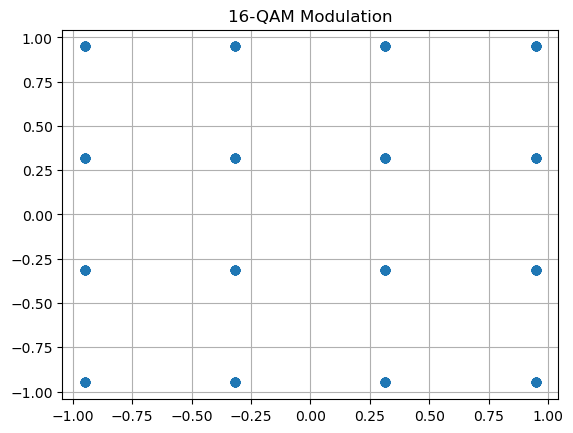

ValueError: shapes (32,64) and (1024,) not aligned: 64 (dim 1) != 1024 (dim 0)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from scipy.special import erfc

# -------------------------------
# 1. Generate Random Bits
# -------------------------------
def generate_bits(N):
    return np.random.randint(0, 2, N)

# -------------------------------
# 2. LDPC Encoding (Simplified)
# -------------------------------
def ldpc_encode(bits, H):
    parity_bits = np.mod(np.dot(H, bits), 2)
    return np.concatenate([bits, parity_bits])

H = np.random.randint(0, 2, (32, 64))  # Example parity check matrix

# -------------------------------
# 3. QAM Modulation
# -------------------------------
def qam_modulate(bits, M=16):
    """
    Perform M-QAM modulation.
    :param bits: Input bit sequence
    :param M: Modulation order (16, 64, 256)
    :return: Modulated QAM symbols
    """
    k = int(np.log2(M))  # Bits per symbol
    bit_groups = np.reshape(bits, (-1, k))
    
    I = np.array([int("".join(map(str, b[:k//2])), 2) for b in bit_groups])
    Q = np.array([int("".join(map(str, b[k//2:])), 2) for b in bit_groups])
    
    I = 2 * I - (np.sqrt(M) - 1)
    Q = 2 * Q - (np.sqrt(M) - 1)
    
    return (I + 1j * Q) / np.sqrt(10)

# Generate random bit sequence
bits = np.random.randint(0, 2, 1000)  # Random bits
symbols = qam_modulate(bits, 16)

# Plot constellation
plt.scatter(symbols.real, symbols.imag)
plt.title("16-QAM Modulation")
plt.grid()
plt.show()

# -------------------------------
# 4. OFDM Modulation
# -------------------------------
def ofdm_modulate(symbols, N=64, cp_len=16):
    ofdm_symbols = np.fft.ifft(symbols, n=N)
    cyclic_prefix = ofdm_symbols[-cp_len:]
    return np.concatenate([cyclic_prefix, ofdm_symbols])

# -------------------------------
# 5. MIMO Channel (Rayleigh Fading)
# -------------------------------
def rayleigh_fading(N):
    return (np.random.randn(N) + 1j * np.random.randn(N)) / np.sqrt(2)

def mimo_beamforming(H):
    U, S, Vh = svd(H)
    return Vh.T  # Precoding matrix

# -------------------------------
# 6. AWGN Noise
# -------------------------------
def awgn(signal, snr_db):
    snr_linear = 10 ** (snr_db / 10)
    noise_power = np.mean(abs(signal) ** 2) / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise

# -------------------------------
# 7. OFDM Demodulation
# -------------------------------
def ofdm_demodulate(ofdm_signal, N=64, cp_len=16):
    return np.fft.fft(ofdm_signal[cp_len:], n=N)

# -------------------------------
# 8. QAM Demodulation
# -------------------------------
def qam_demodulate(symbols, M=16):
    k = int(np.log2(M))
    I = np.round((symbols.real * np.sqrt(10) + (np.sqrt(M) - 1)) / 2).astype(int)
    Q = np.round((symbols.imag * np.sqrt(10) + (np.sqrt(M) - 1)) / 2).astype(int)

    # Convert I and Q values into bit sequences
    I_bits = np.hstack([np.array(list(np.binary_repr(i, width=k//2)), dtype=int) for i in I])
    Q_bits = np.hstack([np.array(list(np.binary_repr(q, width=k//2)), dtype=int) for q in Q])

    # Concatenate the I and Q bit sequences
    bits = np.hstack([I_bits, Q_bits])
    
    return bits.flatten()


# -------------------------------
# 9. LDPC Decoding (Simplified)
# -------------------------------
def ldpc_decode(received_bits, H):
    return received_bits[:H.shape[1] - H.shape[0]]  # Remove parity bits

# -------------------------------
# 10. BER Simulation
# -------------------------------
def simulate_ber(snr_range_db, num_bits=1024):
    ber = []
    for snr_db in snr_range_db:
        bits = generate_bits(num_bits)
        encoded_bits = ldpc_encode(bits, H)
        qam_symbols = qam_modulate(encoded_bits, 16)
        ofdm_signal = ofdm_modulate(qam_symbols)

        H_mimo = np.random.randn(4, 4) + 1j * np.random.randn(4, 4)
        precoder = mimo_beamforming(H_mimo)
        mimo_signal = np.dot(precoder, ofdm_signal.reshape(-1, 4).T).T.flatten()

        faded_signal = rayleigh_fading(len(mimo_signal)) * mimo_signal
        received_signal = awgn(faded_signal, snr_db)

        ofdm_received = ofdm_demodulate(received_signal)
        demodulated_bits = qam_demodulate(ofdm_received, 16)
        decoded_bits = ldpc_decode(demodulated_bits, H)

        bit_errors = np.sum(bits != decoded_bits[:num_bits])
        ber.append(bit_errors / num_bits)

    return ber

snr_values = np.arange(0, 20, 2)
ber_values = simulate_ber(snr_values)

plt.semilogy(snr_values, ber_values, marker='o', linestyle='-')
plt.xlabel("SNR (dB)")
plt.ylabel("BER")
plt.title("BER vs SNR for 5G Modem")
plt.grid()
plt.show()
